In [1]:
import numpy as np 
from scipy.linalg import svdvals
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tqdm.notebook import tqdm
from scipy.stats import spearmanr, kendalltau
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity

In [26]:
n_im = 25 # 25
n_dist = 24 #24
n_level = 5

psnr_score = np.zeros((n_im,n_dist,n_level)) #25 distorts, 24 images,5levels of distortion
for i in tqdm(range(1, n_im + 1)): # over images

    # download target image
    im_path = 'reference_images/i' + "{0:0=2d}".format(i) + '.bmp'
    I_t = np.array(ImageOps.grayscale(Image.open(im_path)))
    for d in range(1, n_dist + 1): # over distortion types
            for l in range(1, n_level + 1): # over level of distortion 
                im_path = 'distorted_images/i' + "{0:0=2d}".format(i) + '_' + "{0:0=2d}".format(d) + '_' + str(l) + '.bmp'
                i_d = np.array(ImageOps.grayscale(Image.open(im_path)))
                psnr_score[i-1,d-1,l-1]=psnr(I_t,i_d)

In [27]:
mos = open('mos.txt', 'r').read().split('\n')
mos = np.array([float(i) for i in mos])
mos_tens = mos.reshape(n_im,n_dist,n_level)
SROCC = np.array([spearmanr(psnr_score[:,d, :].flatten(), mos_tens[:,d, :].flatten())[0] for d in range(n_dist)])
KROCC = np.array([kendalltau(psnr_score[:,d, :].flatten(), mos_tens[:,d, :].flatten())[0] for d in range(n_dist)])

In [57]:
for i in SROCC:
    print(abs(i))

0.9002694341651266
0.8124420113579005
0.8995027596822893
0.7869171771175888
0.8759122745055216
0.8700701405208149
0.7879930199744892
0.9599443313249314
0.9274874768740299
0.9249746157559471
0.8907253995565578
0.8095312706758948
0.8658315348299528
0.7554815465122081
0.6701772715074164
0.7602156105105478
0.31862044812826207
0.37651345482509907
0.82216678552181
0.8252072236220463
0.9322584561131445
0.8139343406257523
0.8654979923377649
0.8845720781526509


In [29]:
spearmanr(psnr_score.flatten(),mos_tens.flatten())[0]

0.6394075398588399

In [30]:
kendalltau(psnr_score.flatten(),mos_tens.flatten())[0]

0.46958213950004335

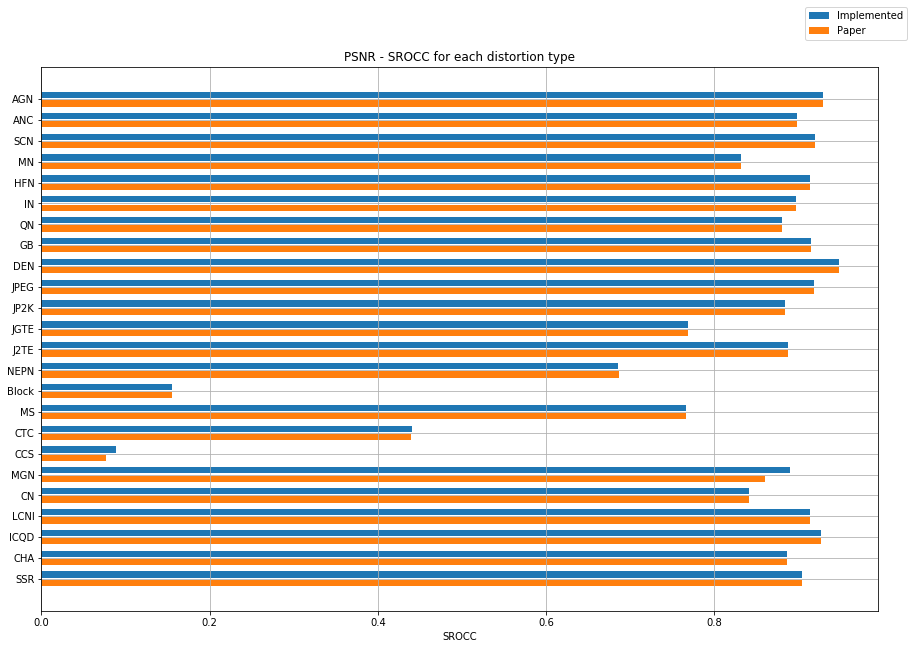

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

h = 0.3
distortions = ('AGN','ANC','SCN','MN','HFN','IN','QN','GB','DEN','JPEG','JP2K','JGTE','J2TE','NEPN','Block','MS','CTC','CCS','MGN','CN','LCNI','ICQD','CHA','SSR')
paper_SROCC = [0.9291,0.8981,0.92,0.8323,0.9140,0.8968,0.8808,0.9149,0.9480,0.9189,0.8840,0.7685,0.8883,0.6863,0.1552,0.7671,0.440,0.0766,0.8605,0.8411,0.9145,0.9269,0.8872,0.9042]
y_pos = np.arange(len(distortions))

w=0.2
ax.barh(y_pos-w, abs(SROCC), height=h,align='center', label='Implemented')
ax.barh(y_pos+w, paper_SROCC, height=h,align='center', label='Paper')
ax.set_yticks(y_pos)
ax.set_yticklabels(distortions)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SROCC')
ax.set_title('PSNR - SROCC for each distortion type')

# plt.xlim(0.1,1)
plt.grid()
plt.legend(bbox_to_anchor=(0.04, 0.82, 1., .3))
plt.show()